In [2]:
import sys
print('python', sys.version)

import numpy as np
print('numpy', np.__version__)

import pandas as pd
print('pandas', pd.__version__)

import matplotlib as mpl
print('matplotlib', mpl.__version__)

import matplotlib.pyplot as plt
import scipy.stats

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

python 3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]
numpy 1.19.1
pandas 1.1.1
matplotlib 3.3.1


## [[ genetic dependency proc (CRISPR) ]]

### get dep_crp

In [14]:
dep_crp=pd.read_table('data_ori/Achilles_gene_effect.csv',index_col=0, sep=',') # CRISPR, 18119 genes, 769 cells
dep_crp.columns=[gene.split(' ')[1] for gene in dep_crp.columns]
dep_crp.columns.name='Entrez_Gene_Id'
dep_crp

Entrez_Gene_Id,(1),(29974),(2),(144568),(127550),(53947),(51146),(8086),(65985),(13),...,(55055),(11130),(7789),(158586),(79364),(440590),(79699),(7791),(23140),(26009)
DepMap_ID,,,,,,,,,,,,,,,,,,,,,
ACH-000004,0.178087,0.088290,-0.201464,-0.017011,0.042590,-0.192257,0.352891,-0.445209,0.292603,0.165168,...,-0.122795,-0.464567,NaN,NaN,0.258084,0.237593,-0.408563,0.291832,0.218575,-0.139759
ACH-000005,-0.082364,0.239413,0.195457,0.163763,-0.188161,-0.338735,0.254489,-0.583878,-0.060615,0.015272,...,-0.195061,-0.408063,-0.155155,-0.067415,0.229242,-0.075883,-0.104001,0.075901,0.036985,-0.243303
ACH-000007,0.070026,0.075066,-0.064637,0.156905,0.099075,0.141985,0.066314,-0.477023,-0.006855,0.291604,...,-0.093252,-0.276874,-0.049716,0.116683,0.211699,-0.012654,-0.351716,0.089140,-0.392549,-0.442624
ACH-000009,0.107048,-0.006352,-0.053166,0.053055,0.081620,-0.038305,0.082421,-0.642935,0.159178,0.064128,...,-0.280677,-0.230111,-0.106000,0.041611,0.083021,0.022771,-0.596777,0.197627,-0.106398,-0.549259
ACH-000011,0.280508,0.079860,0.016981,0.439139,-0.042239,-0.242560,0.103028,-0.419159,0.141445,0.115857,...,-0.410500,-0.507467,-0.138665,-0.119292,0.284407,0.158124,-0.240429,0.124847,-0.250949,-0.379117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-002004,0.194973,0.151985,-0.086708,0.634931,-0.069435,-0.108299,-0.236366,-0.283538,-0.163834,0.200767,...,-0.329865,-0.575501,-0.337311,0.358130,0.200474,0.086894,-0.331683,0.001423,-0.131932,-0.661954
ACH-002005,0.290347,0.049675,0.144091,0.053823,-0.407675,-0.117946,0.227736,-0.331013,-0.077048,0.135808,...,-0.115057,-0.713280,-0.065553,-0.249483,0.304166,-0.080248,-0.123900,0.201571,-0.065916,-0.291976
ACH-002015,0.092499,-0.008914,-0.186905,0.226934,-0.004721,0.023954,0.168358,-0.456707,0.120760,0.026422,...,-0.367360,-0.396577,-0.206556,-0.082090,0.039352,0.139145,-0.226734,0.047219,-0.163631,-0.628672


### delete genes containing nan values

In [15]:
print("##) # of nan: ", dep_crp.isnull().sum(axis=0).sum())
print("##) # of genes: ", len(list(dep_crp)))

print("##) nan counts per gene")
dep_crp.isnull().sum(axis=0)
print("##) nan counts dist.")
dep_crp.isnull().sum(axis=0).value_counts()

dep_crp=dep_crp.loc[:,dep_crp.isnull().sum(axis=0)==0]
print("##) # of nan: ", dep_crp.isnull().sum(axis=0).sum())
print("##) # of genes: ", len(list(dep_crp)))

dep_crp

##) # of nan:  49396
##) # of genes:  18119
##) nan counts per gene


Entrez_Gene_Id
(1)          0
(29974)      0
(2)          0
(144568)     0
(127550)     0
            ..
(440590)     0
(79699)      0
(7791)       0
(23140)      0
(26009)     12
Length: 18119, dtype: int64

##) nan counts dist.


0     16183
12     1230
48      638
59       68
dtype: int64

##) # of nan:  0
##) # of genes:  16183


Entrez_Gene_Id,(1),(29974),(2),(144568),(127550),(53947),(51146),(8086),(65985),(13),...,(23053),(221302),(9183),(55055),(11130),(79364),(440590),(79699),(7791),(23140)
DepMap_ID,,,,,,,,,,,,,,,,,,,,,
ACH-000004,0.178087,0.088290,-0.201464,-0.017011,0.042590,-0.192257,0.352891,-0.445209,0.292603,0.165168,...,-0.174114,-0.161678,-0.160386,-0.122795,-0.464567,0.258084,0.237593,-0.408563,0.291832,0.218575
ACH-000005,-0.082364,0.239413,0.195457,0.163763,-0.188161,-0.338735,0.254489,-0.583878,-0.060615,0.015272,...,-0.273881,-0.231005,-0.497114,-0.195061,-0.408063,0.229242,-0.075883,-0.104001,0.075901,0.036985
ACH-000007,0.070026,0.075066,-0.064637,0.156905,0.099075,0.141985,0.066314,-0.477023,-0.006855,0.291604,...,-0.131611,-0.106505,-0.580785,-0.093252,-0.276874,0.211699,-0.012654,-0.351716,0.089140,-0.392549
ACH-000009,0.107048,-0.006352,-0.053166,0.053055,0.081620,-0.038305,0.082421,-0.642935,0.159178,0.064128,...,-0.201588,0.093851,-0.437097,-0.280677,-0.230111,0.083021,0.022771,-0.596777,0.197627,-0.106398
ACH-000011,0.280508,0.079860,0.016981,0.439139,-0.042239,-0.242560,0.103028,-0.419159,0.141445,0.115857,...,-0.099465,0.074328,-0.697993,-0.410500,-0.507467,0.284407,0.158124,-0.240429,0.124847,-0.250949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-002004,0.194973,0.151985,-0.086708,0.634931,-0.069435,-0.108299,-0.236366,-0.283538,-0.163834,0.200767,...,-0.278135,-0.255279,-0.559807,-0.329865,-0.575501,0.200474,0.086894,-0.331683,0.001423,-0.131932
ACH-002005,0.290347,0.049675,0.144091,0.053823,-0.407675,-0.117946,0.227736,-0.331013,-0.077048,0.135808,...,-0.049274,0.115309,-0.496360,-0.115057,-0.713280,0.304166,-0.080248,-0.123900,0.201571,-0.065916
ACH-002015,0.092499,-0.008914,-0.186905,0.226934,-0.004721,0.023954,0.168358,-0.456707,0.120760,0.026422,...,0.045786,-0.013114,-0.885187,-0.367360,-0.396577,0.039352,0.139145,-0.226734,0.047219,-0.163631


### depletion score histogram of each cell line

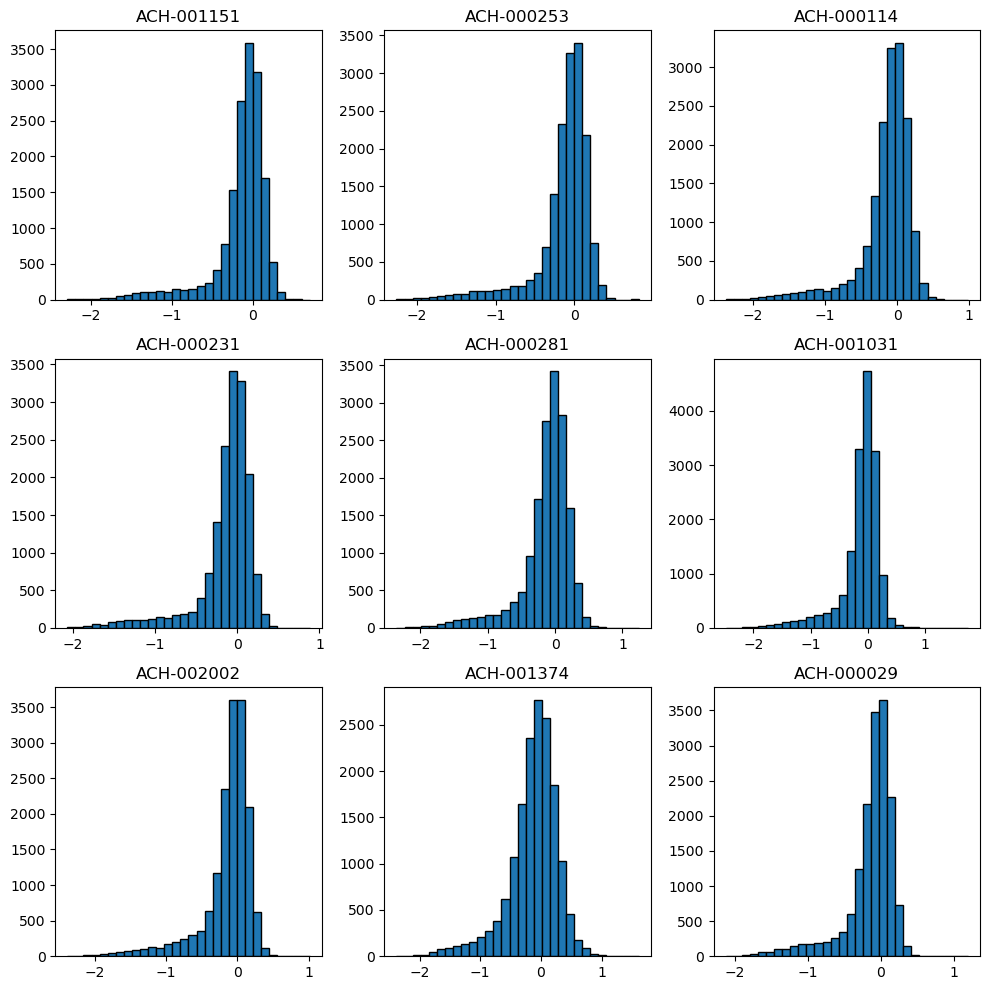

In [26]:
fig=plt.figure(figsize=(10,10), dpi=100)
axs=fig.subplots(3,3).flatten()
ran_cells=np.random.choice(dep_crp.index, size=9, replace=False)

for ax_cnt, cell in enumerate(ran_cells):
    _=axs[ax_cnt].hist(dep_crp.loc[cell], bins=30, edgecolor='k')
    _=axs[ax_cnt].set_title(cell, fontsize=12)
    
fig.tight_layout()

### save the dep_crp

In [17]:
dep_crp.to_csv('data_preproc/dep_crisper.txt',sep='\t')

## [[ genetic dependency proc (shRNA) ]]

### get dep_shr

In [27]:
dep_shr=pd.read_table('data_ori/D2_combined_gene_dep_scores.csv',index_col=0, sep=',') 
dep_shr.columns=[cell.split('_')[0] for cell in dep_shr.columns]
dep_shr.index=[gene.split(' ')[1] for gene in dep_shr.index]
dep_shr=dep_shr.T
dep_shr
print('shRNA ori: ', dep_shr.shape)

# mapping cell name to depmap ID
sample=pd.read_table('data_ori/sample_info.csv',index_col=1, sep=',')
def f1(x):
    if x in sample.index:
        return sample.loc[x,'DepMap_ID']
    return 'NotAvail'
dep_shr.index=dep_shr.index.map(f1)
dep_shr=dep_shr.loc[dep_shr.index!='NotAvail']
print('shRNA after removing cells with no cell ID: ', dep_shr.shape)

,(1),(10),(100),(1000),(10000),(10001),(10002),(10003),(100033411),(100034743),...,(9986),(9987),(9988),(9989),(999),(9990),(9992),(9993),(9994),(9997)
127399,NaN,NaN,NaN,-0.194962,-0.256108,-0.174220,-0.140052,NaN,NaN,NaN,...,-0.201644,-0.363670,0.184260,-0.115616,-0.125958,NaN,0.088853,NaN,-0.843295,NaN
1321N1,NaN,NaN,NaN,-0.028171,0.100751,-0.456124,-0.174618,NaN,NaN,NaN,...,0.074889,0.152158,0.036011,0.117300,0.101725,NaN,-0.110628,NaN,-0.307031,NaN
143B,0.146042,0.102854,0.168839,0.063047,-0.008077,-0.214376,-0.153619,0.133830,0.138673,0.030345,...,0.006735,-0.033385,0.197651,-0.016372,0.077486,0.106165,0.057286,0.025596,-0.413669,0.122669
184A1,-0.190388,0.384106,-0.120700,-0.237251,0.060267,-0.338946,-0.057551,0.134511,NaN,0.144463,...,0.209009,-0.156839,-0.155837,-0.001141,NaN,0.227968,0.028095,-0.080611,-1.849696,-0.078856
184B5,0.907063,0.403192,0.004394,-0.017059,-0.094749,-0.328074,-0.089573,0.362029,NaN,-0.098161,...,-0.137465,-1.037848,-0.261262,-0.228016,NaN,0.088744,0.159467,0.014071,-0.414154,0.032661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YKG1,0.111530,0.073460,0.227977,0.000769,-0.072564,-0.175593,-0.155250,0.105052,0.143781,0.357053,...,-0.079333,-0.358065,-0.090982,0.168945,-0.173036,0.141616,0.109206,0.153414,-0.046700,0.075238
YMB1,NaN,NaN,NaN,-0.139126,0.017161,-0.226356,-0.445319,NaN,NaN,NaN,...,-0.050825,0.286697,0.134608,-0.166845,0.065173,NaN,-0.048763,NaN,-0.865486,NaN
ZR751,-0.079313,-0.130921,-0.134479,0.047022,0.123615,-0.311682,-0.211145,-0.014285,0.074681,-0.053025,...,-0.143304,-0.078062,-0.022528,0.021830,0.308641,0.100142,0.128882,0.159781,-1.039110,0.100361
ZR7530,-0.141559,0.127358,0.083506,-0.097644,0.046846,-0.355300,-0.095010,0.049151,0.129006,0.038661,...,-0.146587,-0.050230,0.127782,-0.031292,0.035794,0.160643,-0.179656,0.286456,-0.301415,-0.117268


shRNA ori:  (712, 17309)
shRNA after removing cells with no cell ID:  (710, 17309)


### delete genes and cells containing nan values

In [28]:
dep_shr=dep_shr.loc[:,dep_shr.isnull().sum(axis=0)<7]
print('shRNA after removing genes with more or equal seven nan values: ', dep_shr.shape)

dep_shr=dep_shr.loc[dep_shr.isnull().sum(axis=1)==0]
print('shRNA after removing cells with at least one nan values: ', dep_shr.shape)

dep_shr.columns.name='Entrez_Gene_Id'
dep_shr.index.name='DepMap_ID'

print("##) # of nan: ", dep_shr.isnull().sum(axis=0).sum())
dep_shr

shRNA after removing genes with more or equal seven nan values:  (710, 5899)
shRNA after removing cells with at least one nan values:  (702, 5899)
##) # of nan:  0


Entrez_Gene_Id,(1000),(10000),(10001),(10002),(100049587),(10008),(10009),(1001),(100128627),(10013),...,(9971),(9973),(9975),(998),(9986),(9987),(9988),(9989),(9992),(9994)
DepMap_ID,,,,,,,,,,,,,,,,,,,,,
ACH-001270,-0.194962,-0.256108,-0.174220,-0.140052,0.077742,-0.235161,-0.012051,0.135390,0.197630,-0.042870,...,0.077694,0.224705,0.178494,-0.273734,-0.201644,-0.363670,0.184260,-0.115616,0.088853,-0.843295
ACH-001000,-0.028171,0.100751,-0.456124,-0.174618,-0.111691,-0.057127,-0.036372,0.019846,0.053259,0.022057,...,-0.120004,0.249664,-0.057862,-0.274488,0.074889,0.152158,0.036011,0.117300,-0.110628,-0.307031
ACH-001001,0.063047,-0.008077,-0.214376,-0.153619,-0.195624,0.143540,-0.003294,0.137083,-0.184220,0.000256,...,0.265685,-0.003567,0.064435,-0.065205,0.006735,-0.033385,0.197651,-0.016372,0.057286,-0.413669
ACH-002319,-0.237251,0.060267,-0.338946,-0.057551,-0.659711,0.012571,-0.091389,0.129589,-0.012625,0.252361,...,-0.132103,-0.264411,0.036777,0.156517,0.209009,-0.156839,-0.155837,-0.001141,0.028095,-1.849696
ACH-001827,-0.017059,-0.094749,-0.328074,-0.089573,-0.284499,0.071039,-0.118892,0.248833,0.100555,0.331037,...,-0.210424,0.242201,0.276576,-0.179985,-0.137465,-1.037848,-0.261262,-0.228016,0.159467,-0.414154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-000570,0.000769,-0.072564,-0.175593,-0.155250,-0.209695,-0.045850,-0.248584,0.269947,-0.153742,-0.022693,...,0.133083,0.121545,0.102761,-0.209405,-0.079333,-0.358065,-0.090982,0.168945,0.109206,-0.046700
ACH-001249,-0.139126,0.017161,-0.226356,-0.445319,-0.046061,0.290969,-0.133735,-0.079662,0.167594,-0.095345,...,0.089457,0.231828,0.525148,0.127328,-0.050825,0.286697,0.134608,-0.166845,-0.048763,-0.865486
ACH-000097,0.047022,0.123615,-0.311682,-0.211145,-0.257977,-0.125789,-0.201745,0.182527,0.026933,0.112581,...,0.287817,0.121386,0.015063,-0.539853,-0.143304,-0.078062,-0.022528,0.021830,0.128882,-1.039110


### depletion score histogram of each cell line

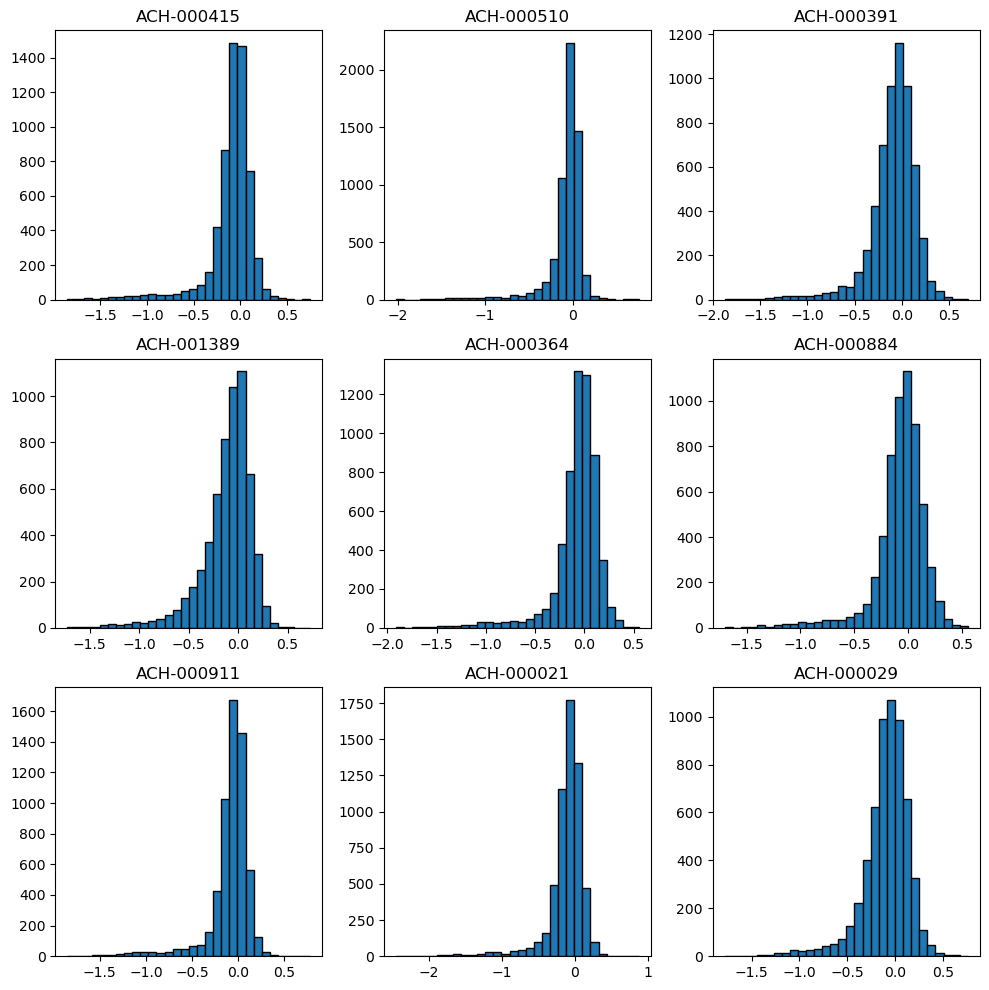

In [29]:
fig=plt.figure(figsize=(10,10), dpi=100)
axs=fig.subplots(3,3).flatten()
ran_cells=np.random.choice(dep_shr.index, size=9, replace=False)

for ax_cnt, cell in enumerate(ran_cells):
    _=axs[ax_cnt].hist(dep_shr.loc[cell], bins=30, edgecolor='k')
    _=axs[ax_cnt].set_title(cell, fontsize=12)

fig.tight_layout()

### save the dep_shr

In [30]:
dep_shr.to_csv('data_preproc/dep_shRNA.txt',sep='\t')